In [1]:
%load_ext autoreload
%autoreload 2

from ionoptics import bmad
import matplotlib.pyplot as plt


## Orbit data

### Playground

In [7]:
PATH_TO_DATA = '../../Bmad/Playground/production/bin/'

df_PG = bmad.txt_to_df(PATH_TO_DATA, 'tracking_ele.txt')

xmax @  start: 0.008794187512927744
xrms @  start: 0.002270840286715482
xprms @  start: 0.0011186405353278265


xmax @  end: 0.007402022547663851
xrms @  end: 0.0021562252387944034


ymax @  start: 0.008324915486026298
yrms @  start: 0.002270840286715489


ymax @  end: 0.00795081266537822
yrms @  end: 0.0023784340126461975


particle loss/%: 0.0


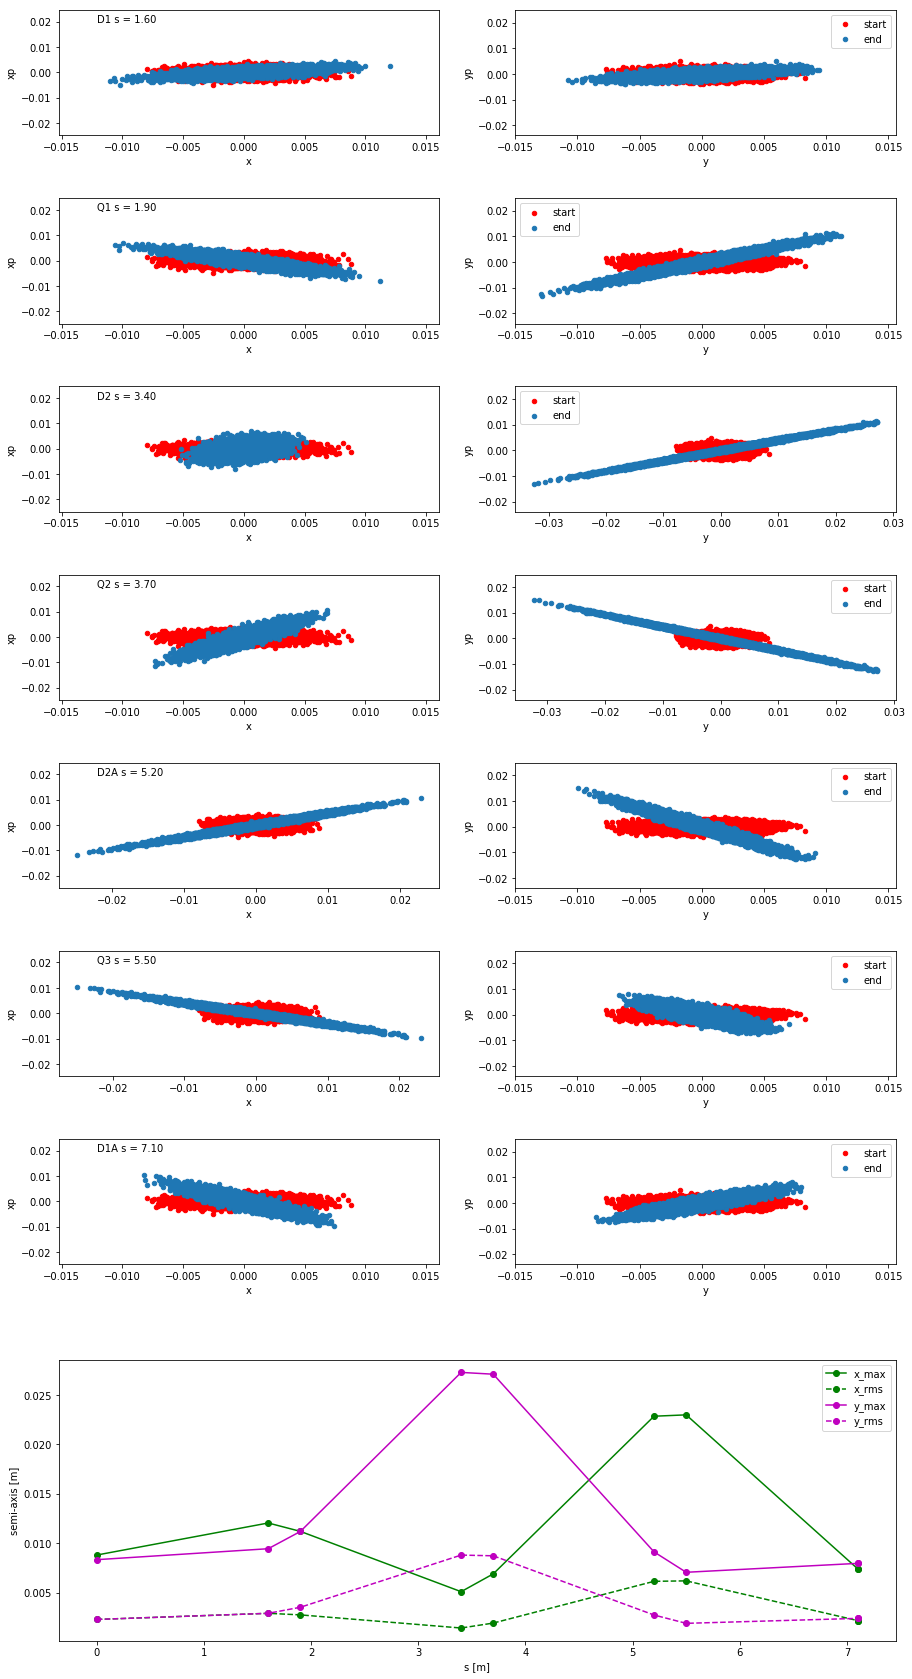

In [8]:
bmad.plot_phase_space(df_PG, figsize = (15,30))

plt.show()

### BigKarl

In [2]:
PATH_TO_DATA = '../../Bmad/BigKarlLine/Codes/Marius/production/bin/'

df_BK = bmad.txt_to_df(PATH_TO_DATA, 'tracking_ele.txt')

xmax @  start: 0.017384082674177834
xrms @  start: 0.005744849799901122
xprms @  start: 0.0005744849799901121


xmax @  end: 0.027653622974701204
xrms @  end: 0.007897764766135369


ymax @  start: 0.02700133383082472
yrms @  start: 0.008944719145846882


ymax @  end: 0.03601295033404784
yrms @  end: 0.010879781393485182


particle loss/%: 4.07


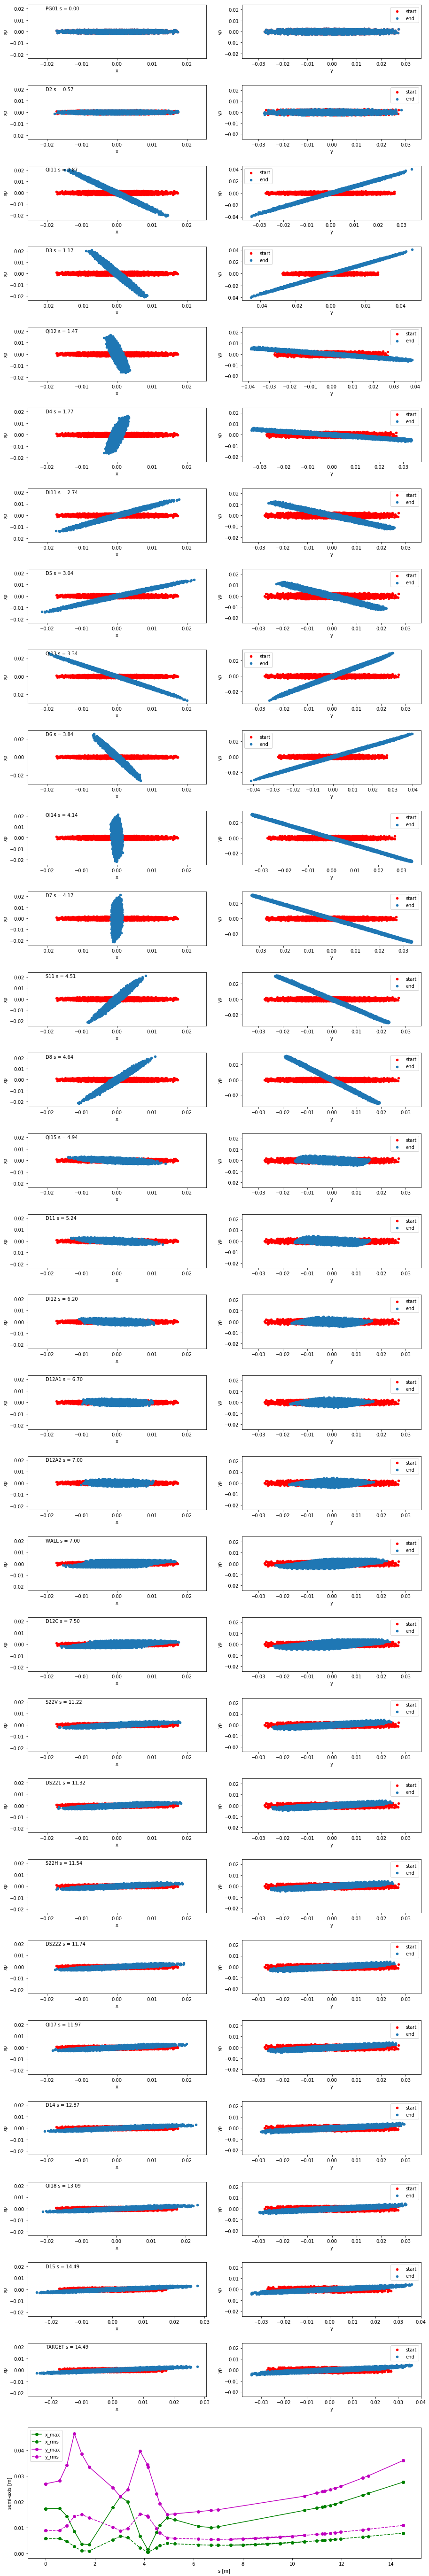

In [6]:
bmad.plot_phase_space(df_BK, figsize = (15,100))

plt.show()